# Sci-kit learn

## Prerequesites

In [1]:
#!pip install mglearn
#!pip install sklearn
#!pip install numpy
#!pip install pandas
#!pip install matplotlib

import warnings
warnings.filterwarnings('ignore')

## Included data-sets

**from sklearn.datasets**
**load_boston()** #Load and return the boston house-prices dataset (regression).<br>
**load_iris()** #Load and return the iris dataset (classification).<br>
**load_diabetes()** #Load and return the diabetes dataset (regression).<br>
**load_digits()** #Load and return the digits dataset (classification).<br>
**load_linnerud()** #Load and return the linnerud dataset (multivariate regression).<br>
**load_wine()** #Load and return the wine dataset (classification).<br>
**load_breast_cancer()** #Load and return the breast cancer wisconsin dataset (classification).<br>

## Supervised learning models

## k-Nearest Neighbours

In [2]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=2)


C:\Users\jsors\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


### Generating some random data

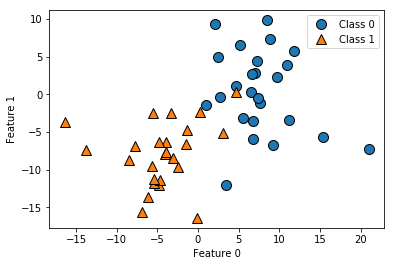

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import mglearn
from sklearn.datasets.samples_generator import make_blobs

# Create 50 (n_samples=50) datapoints clustered together as two (center=3) blobs
# The within-cluster spread (cluster_std=0.70) of the datapoints is 0.7
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=45, cluster_std=5)

# Each datapoint in X is tuple of values (x0, x1). Lets plot them 
# on x and y axes respectively.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y);
plt.legend(["Class 0", "Class 1"])
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

### Creating model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Split the data into trainting and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66, test_size=0.33)

# build the model    
knn_classifier = KNeighborsClassifier(n_neighbors=3)    
knn_classifier.fit(X_train, y_train)  

# Predict test data
 
# See accuracy on test data
print("Test set accuracy: {:.2f}".format(knn_classifier.score(X_test, y_test)))

print(knn_classifier.predict([[0, 5]]))

Test set predictions: [0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1]
Test set accuracy: 0.88
[0]


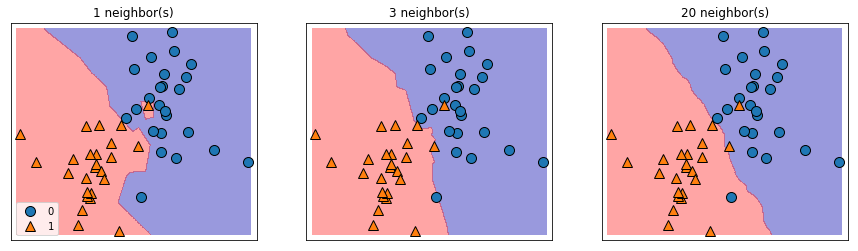

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for n_neighbors, ax in zip([1, 3, 20], axes):
    # the fit method returns the object self, so we can instantiate# and fit in one line    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    
axes[0].legend(loc=3)
    

### k-NN example with wine dataset

In [6]:
from sklearn import neighbors, datasets
from sklearn.datasets import load_wine
import pandas

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
display(df.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Best accuracy:  0.7555555555555555  with  9  neighbours.


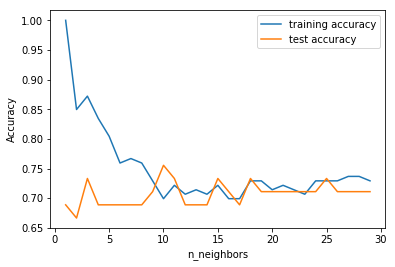

In [7]:
# Split the data into trainting and testing data
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=66)

# Create array with number of neighbours to use in the classifier
neighbour_range = range(1, 30)

training_accuracy = []
test_accuracy = []
for neighbours in neighbour_range:
    # build the model    
    clf = KNeighborsClassifier(n_neighbors=neighbours)    
    clf.fit(X_train, y_train) 
    
    # Evaluate accuracy of model with n neighbours
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbour_range, training_accuracy, label="training accuracy")
plt.plot(neighbour_range, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# Best accuracy
print('Best accuracy: ', max(test_accuracy), " with ", test_accuracy.index(max(test_accuracy)), " neighbours.")

## Multinomial Naive Bayes

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

# Examples of models in sklearn

In [8]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(C=0.001, solver='liblinear', multi_class='ovr')
logistic_regression.fit(X_train, y_train)  

# See accuracy on test data
print("Test set accuracy: {:.2f}".format(logistic_regression.score(X_test, y_test)))

Test set accuracy: 0.76


In [9]:
from sklearn import svm

svm_classifier = svm.SVC(kernel='rbf', C=5, gamma=0.05, probability=True)
svm_classifier.fit(X_train, y_train)  

# See accuracy on test data
print("Test set accuracy: {:.2f}".format(svm_classifier.score(X_test, y_test)))

Test set accuracy: 0.51


In [10]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(criterion='entropy')
decision_tree_classifier.fit(X_train, y_train)  

# See accuracy on test data
print("Test set accuracy: {:.2f}".format(decision_tree_classifier.score(X_test, y_test)))

Test set accuracy: 0.98


In [11]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=12, max_depth=None, min_samples_split=2,
                                                          random_state=0, verbose=2)

random_forest_classifier.fit(X_train, y_train)  

# See accuracy on test data
print("Test set accuracy: {:.2f}".format(random_forest_classifier.score(X_test, y_test)))

building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12
Test set accuracy: 0.96


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished


In [12]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('dt', logistic_regression),
                                          ('rf', decision_tree_classifier),
                                          ('knn', random_forest_classifier),
                                          ('lr', knn_classifier)], voting='soft')

random_forest_classifier.fit(X_train, y_train)  

# See accuracy on test data
print("Test set accuracy: {:.2f}".format(random_forest_classifier.score(X_test, y_test)))

building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12
Test set accuracy: 0.96


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished


# Oppgave

### 1. Last inn load_iris() dataset for klassifisering av blomster
### 2. Del det opp is test og treningsdata med train_test_split
### 3. Lag en k-NN modell
### 4. Fit dataen med model.fit(X,Y)
### 5. Sjekk accuracy på testset med model.score(x,y)
### 6. Test med forskjellige n neighbours (for loop)
### 7. Prøv en annen modell, og se om den er bedre:
### Logistic regression, linear regression, svm, naive bayes, decision tree osv...

# Linear Models

Linear models make a prediction using a linear function of the input features

## Linear Regression

Formula for linear function:<br>
ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

**ŷ** is the prediction<br>
**x[0]** to **x[p]** denotes the features<br>
**w** and **b** are learned parameters<br>

Linear regression finds the parameters w and b that minimize the `mean square error`:

$$
MSE = \dfrac{1}{n} \sum_{i=1}^{n} [y_i - (w_0 x_i + w_1)]^2 
$$

https://www.mathsisfun.com/data/least-squares-regression.html

w[0]: 0.393906  b: -0.031804


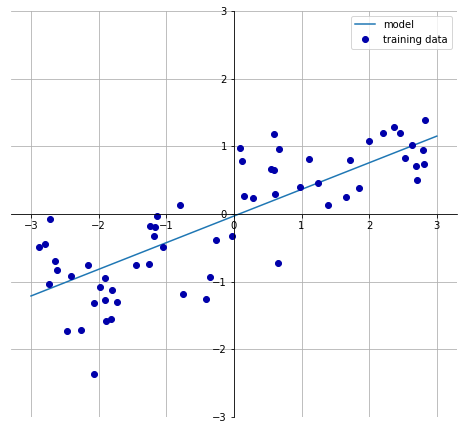

In [34]:
mglearn.plots.plot_linear_regression_wave()

In [35]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
print("The slope parameters (w): {}".format(linear_regression.coef_))
print("The intercept(offset) b: {}".format(linear_regression.intercept_))

print("Training set score: {:.2f}".format(linear_regression.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linear_regression.score(X_test, y_test)))

The slope parameters (w): [0.46802804]
The intercept(offset) b: 0.094243425218751
Training set score: 0.69
Test set score: 0.57


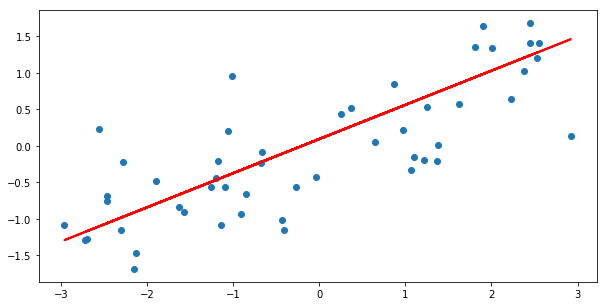

In [37]:
y_pred = linear_regression.predict(X_test)

# Plot outputs
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

#### Lets try to fit some polynomial data

In [38]:
import numpy as np
# define the number of points to generate as k
k = 60
np.random.seed(12)
X = 3 * np.random.rand(k, 1) - 1.5
# sort the numbers in ascending order. This helps when we are plotting the data. 
# Without this line, your plots will be all jumbled up
X.sort(axis=0)
# generate k y-axis values
y = 0.8* -X**2 + X + 2 + np.random.rand(k, 1)

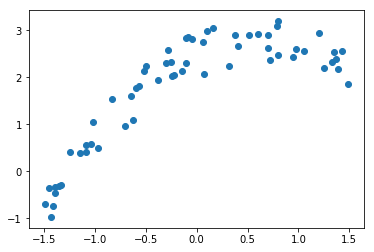

In [39]:
plt.scatter(X, y)

Clearly, a straight line will never fit this data properly. So lets use Scikit-Learn’s `PolynomialFeatures`
class to transform our training data by adding the square of X in the training set as new feature.

Text(0,0.5,'y')

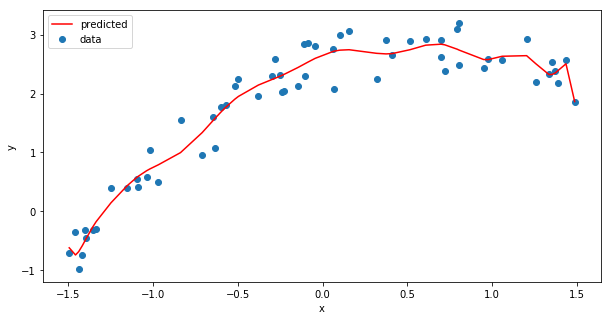

In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=15, include_bias=False)

# generate polyonimal features upto degree 2 from the vector X
X_poly = poly_features.fit_transform(X)

# Now we fit a linear model to the X_poly (the transformed features set) and y
linear_regression.fit(X_poly, y)

y_pred_linear = linear_regression.predict(X_poly)


plt.figure(figsize=(10,5))
plt.scatter(X, y, label='data')
plt.plot(X, y_pred_linear, color='r', label='predicted')
plt.legend(loc='best')

plt.xlabel('x')
plt.ylabel('y')

# Ridge regression


As you might have noticed from the above task, as the degree of polynomial increases, the model starts to overfit. Model overfitting often happens when you have:
- lots of features, and 
- too little data per feature. 

The model starts memorizing the data, rather than generalizing.

To prevent model from overfitting, we can do regularization. In regularization, we add a penalty term to the loss function. This penalty means that the coefficients are restricted to be close to zero, and prevents the model from overfitting.

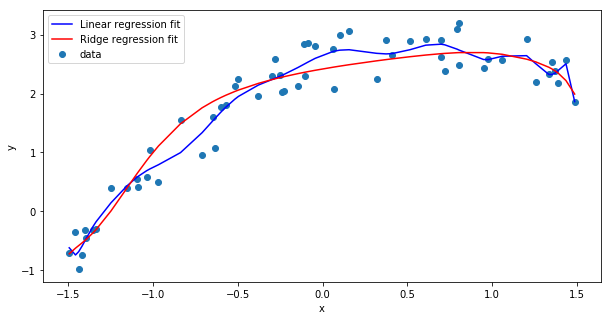

In [47]:
from sklearn.linear_model import Ridge

# The alpha value decides how the coefficients are restricted
ridge = Ridge(alpha = 5)
ridge.fit(X_poly, y)
y_pred_ridge = ridge.predict(X_poly)

plt.figure(figsize=(10,5))
plt.scatter(X, y, label='data')
plt.plot(X, y_pred_linear, color='b', label='Linear regression fit')
plt.plot(X, y_pred_ridge, color='r', label='Ridge regression fit')

plt.xlabel('x')
plt.ylabel('y')

plt.legend(loc='best')

## Lasso
Similarly to ridge lasso also restricts coefficients to be close to zero, but in a slightly different way, the L1 regularization.

L1 regularization causes some coefficents to be exacly zero, which means that those features are essentially ignored by the model.

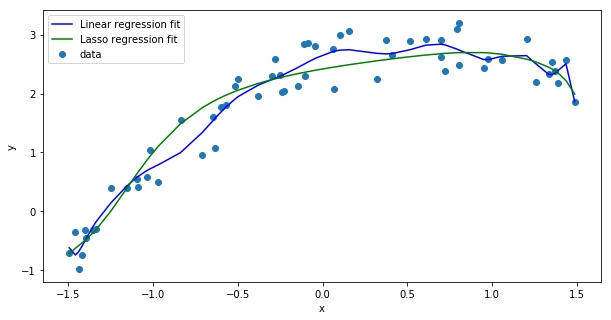

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_poly, y)
y_pred_lasso = ridge.predict(X_poly)

plt.figure(figsize=(10,5))
plt.scatter(X, y, label='data')
plt.plot(X, y_pred_linear, color='b', label='Linear regression fit')
plt.plot(X, y_pred_lasso, color='g', label='Lasso regression fit')

plt.xlabel('x')
plt.ylabel('y')

plt.legend(loc='best')

## Lets see how each of these models perform with the wine data set

In [52]:
# Split the data into trainting and testing data
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=66)

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
print("Linear Regression")
print("Training set score: {:.2f}".format(linear_regression.score(X_train, y_train)))
print("Test set score: {:.2f}\n".format(linear_regression.score(X_test, y_test)))

ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)

print("Ridge")
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}\n".format(ridge.score(X_test, y_test)))

#alpha = 0.01
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)

print("Lasso")
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Linear Regression
Training set score: 0.91
Test set score: 0.84

Ridge
Training set score: 0.91
Test set score: 0.85

Lasso
Training set score: 0.90
Test set score: 0.86
Number of features used: 9


## Oppgave

1. load in load_boston()
2. split data in training and test
3. Use Linear Regression on data
4. Print accuracy
5. Try with Ridge and/or Lasso. Find the best alpha value
6. Try with a different model (knn, svm, logistic regression, decision trees, random forest osv..)
6. Which one has the best accuracy?

In [58]:
from sklearn.datasets import load_boston

# Load data
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
display(df.head())
display(df.describe())
#boston.target

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# SOLUTION

In [25]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=66)
# Ridge grid search
a = np.arange(0, 10, 0.1)
#print(a)
ridge = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 2])

ridge.fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Best alpha: ", ridge.alpha_)

Training set score: 0.71
Test set score: 0.82
Best alpha:  0.01


In [26]:
# Split the data into trainting and testing data
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=66)

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
print("Linear Regression")
print("Training set score: {:.2f}".format(linear_regression.score(X_train, y_train)))
print("Test set score: {:.2f}\n".format(linear_regression.score(X_test, y_test)))

ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)

print("Ridge")
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}\n".format(ridge.score(X_test, y_test)))

#alpha = 0.01
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)

print("Lasso")
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Linear Regression
Training set score: 0.71
Test set score: 0.82

Ridge
Training set score: 0.71
Test set score: 0.82

Lasso
Training set score: 0.71
Test set score: 0.82
Number of features used: 13


In [27]:
from sklearn.linear_model import LassoLarsCV
from sklearn.datasets import make_regression
X, y = make_regression(noise=4.0, random_state=0)
lassoL = LassoLarsCV(cv=5).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lassoL.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lassoL.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lassoL.coef_ != 0)))
print("Alpha: ", lassoL.alpha_)

Training set score: 0.71
Test set score: 0.82
Number of features used: 12
Alpha:  0.0017865427434652491
